In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# dates = [mdates.datestr2num(date) for date in dates]


In [72]:
AllFlights = pd.read_csv("flightALL.csv")
AllFlights['FlightDate'] = pd.to_datetime(AllFlights['FlightDate'])
print(AllFlights['FlightDate'].dtype)

datetime64[ns]


(70,)


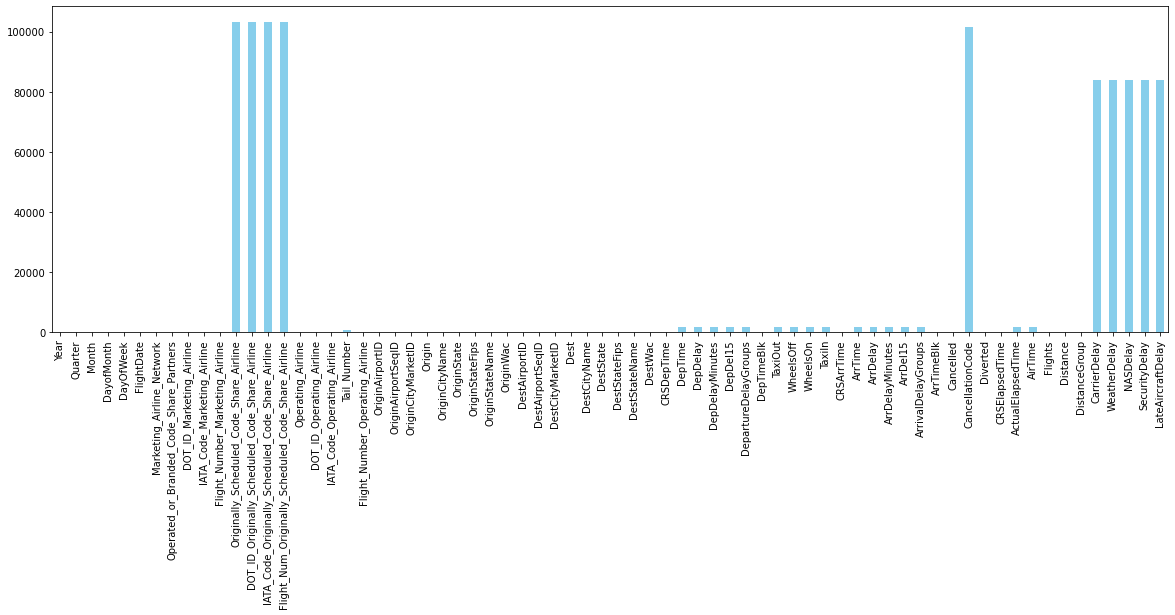

In [3]:
missing_values = AllFlights.isna()
distribution = (missing_values).sum()
print(distribution.shape)
plt.figure(figsize=(20, 6))
distribution.plot(kind='bar', color='skyblue')
plt.show()

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(distribution)

Year                                                       0
Quarter                                                    0
Month                                                      0
DayofMonth                                                 0
DayOfWeek                                                  0
FlightDate                                                 0
Marketing_Airline_Network                                  0
Operated_or_Branded_Code_Share_Partners                    0
DOT_ID_Marketing_Airline                                   0
IATA_Code_Marketing_Airline                                0
Flight_Number_Marketing_Airline                            0
Originally_Scheduled_Code_Share_Airline               103237
DOT_ID_Originally_Scheduled_Code_Share_Airline        103237
IATA_Code_Originally_Scheduled_Code_Share_Airline     103237
Flight_Num_Originally_Scheduled_Code_Share_Airline    103237
Operating_Airline                                          0
DOT_ID_Operating_Airline

In [5]:
selected_columns = ["DepTime", "ArrTime", "ArrDelay", "FlightDate"]

data = AllFlights[selected_columns]

In [6]:
# 

grouped = data.groupby('FlightDate')

missing_counts = grouped['DepTime', 'ArrTime', 'ArrDelay'].apply(lambda x: x.isna().sum())

/var/folders/06/m8yj5m3539gb2tj0snbr9jh80000gn/T/ipykernel_39001/4091489144.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  missing_counts = grouped['DepTime', 'ArrTime', 'ArrDelay'].apply(lambda x: x.isna().sum())


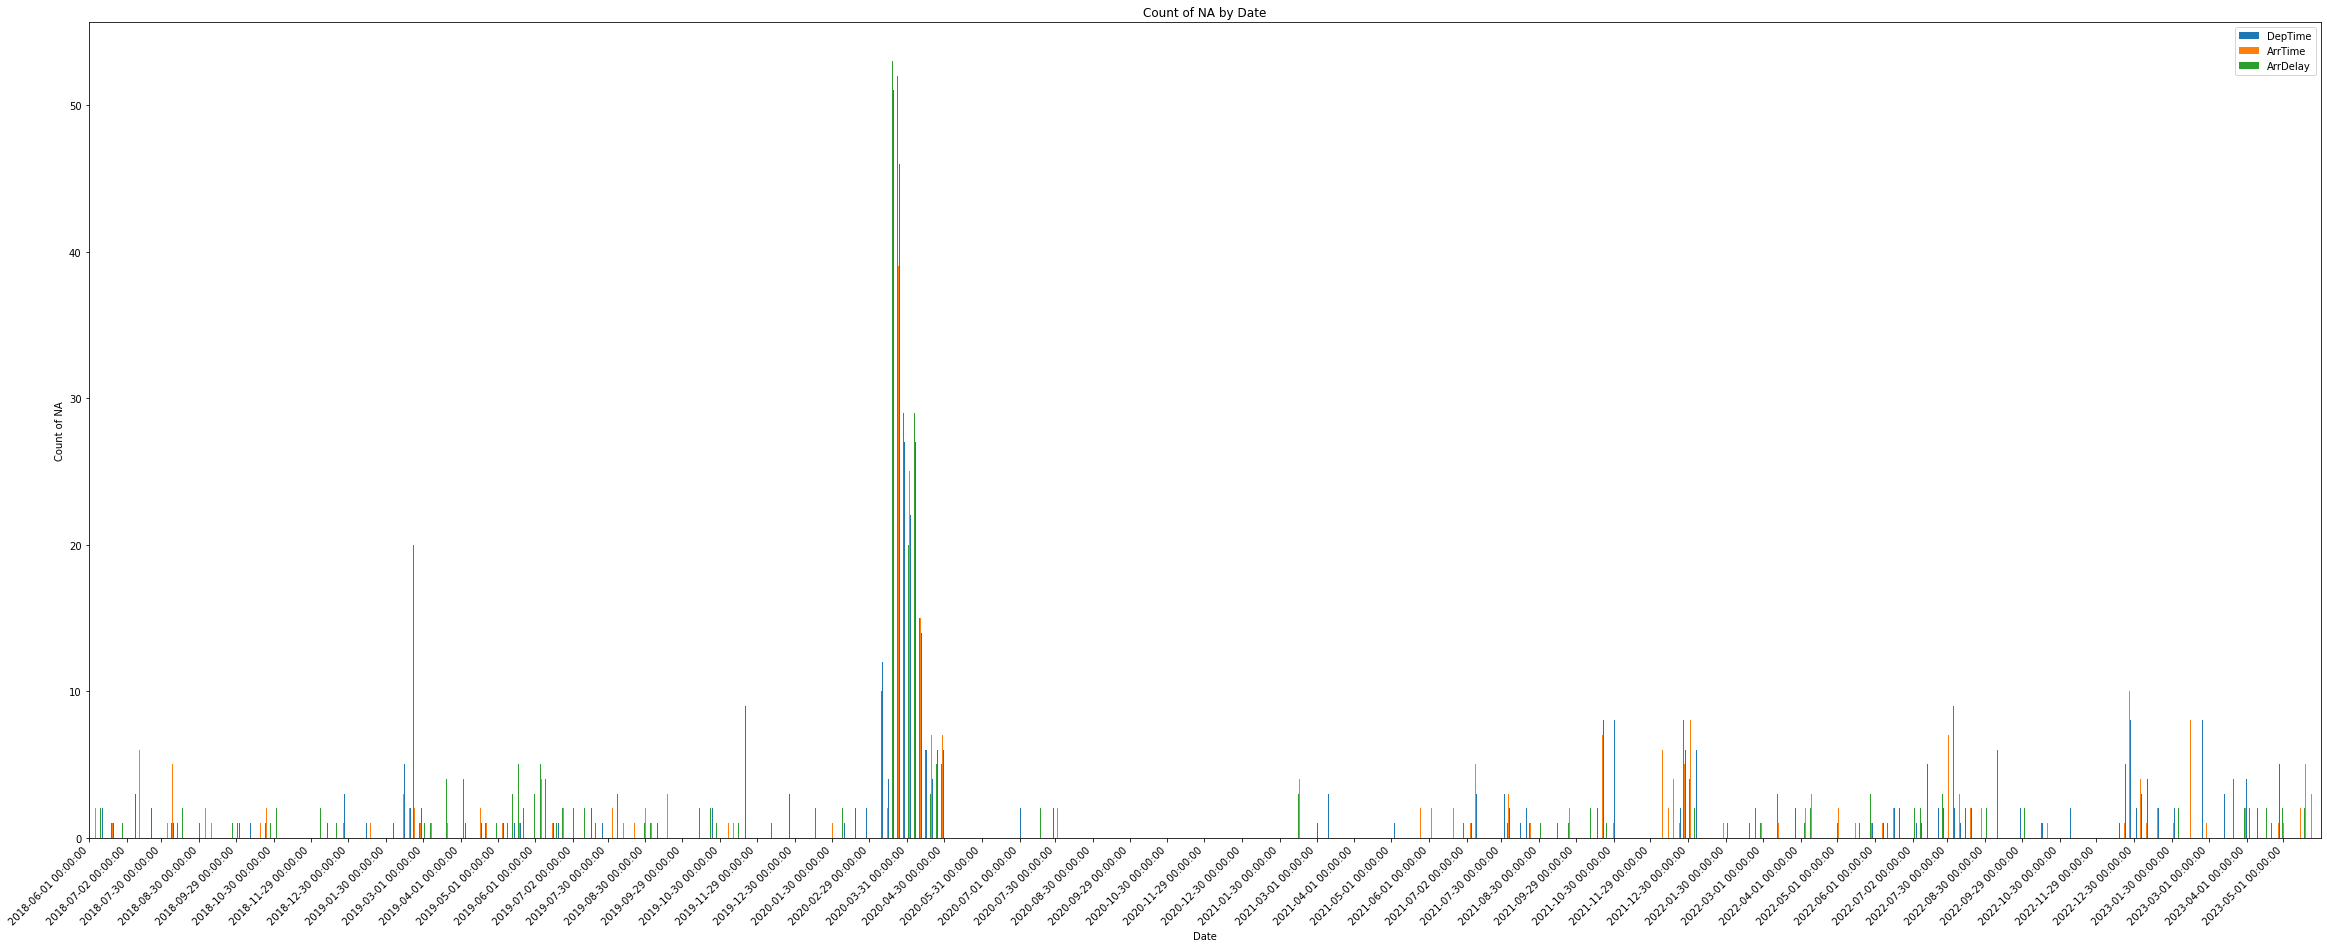

In [7]:
fig, ax = plt.subplots(figsize=(40, 15))

missing_counts.plot(kind='bar', ax=ax)


plt.xlabel('Date')
plt.ylabel('Count of NA')
plt.title('Count of NA by Date')
plt.xticks(rotation=45, ha='right', va='top')

ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [8]:
# print(missing_counts)

In [9]:
selected2 = ["Cancelled", "FlightDate"]
data2 = AllFlights[selected2]

In [10]:
grouped2 = data2.groupby('FlightDate')

cancell = grouped2['Cancelled'].sum()

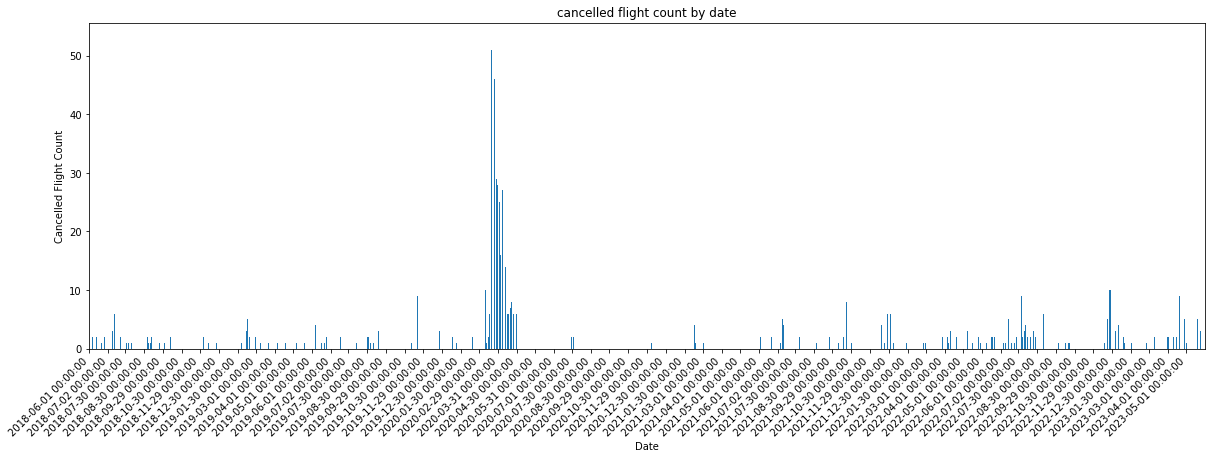

In [11]:
fig, ax = plt.subplots(figsize=(20, 6))

cancell.plot(kind='bar', ax=ax)
plt.xlabel('Date')
plt.ylabel('Cancelled Flight Count')
plt.title('cancelled flight count by date')
plt.xticks(rotation=45,  ha='right', va='top')

ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [23]:
# check
columns3 = ["DepTime", "ArrTime", "ArrDelay", "FlightDate", "Cancelled"]
data3 = AllFlights[columns3]
start_date = pd.to_datetime('2020-03-02')
end_date = pd.to_datetime('2020-04-30')

sliced3 = data3.loc[(data3['FlightDate'] >= start_date) & (data3['FlightDate'] <= end_date)
                   & data3['Cancelled'] == 1]

sliced4 = data3.loc[(data3['Cancelled'] == 0) & data3['ArrTime'].isna()]

print(sliced4)

# print(sliced3)

       DepTime  ArrTime  ArrDelay FlightDate  Cancelled
6789    1952.0      NaN       NaN 2019-04-09          0
11256   2036.0      NaN       NaN 2019-06-21          0
89526   1432.0      NaN       NaN 2022-10-22          0
95262   1732.0      NaN       NaN 2023-01-09          0


In [52]:
# set wanted useful features
Useful_Features = ["ArrTime", "ArrDelay", "FlightDate", "Cancelled", "CRSArrTime",
                   "ArrDelayMinutes"]
# slice the original dataframe
sliced_data = AllFlights[Useful_Features]

# count of cancellation
print(len(sliced_data.loc[sliced_data['Cancelled']==1]))

1812


In [ ]:
# there are 1812 flights cancelled

In [45]:
# not cancelled
# ArrTime NA
ArrTimeNA = sliced_data.loc[(sliced_data['Cancelled']==0) & sliced_data['ArrTime'].isna()]
print(ArrTimeNA)

       ArrTime  ArrDelay FlightDate  Cancelled  CRSArrTime  ArrDelayMinutes
6789       NaN       NaN 2019-04-09          0        2035              NaN
11256      NaN       NaN 2019-06-21          0        1815              NaN
89526      NaN       NaN 2022-10-22          0        1555              NaN
95262      NaN       NaN 2023-01-09          0        1855              NaN


In [66]:
# continue with ArrDelay NA
ArrDelayNA = sliced_data.loc[(sliced_data['Cancelled']==0) & sliced_data['ArrDelay'].isna()]
print(ArrDelayNA)
print(len(ArrDelayNA))

        ArrTime  ArrDelay FlightDate  Cancelled  CRSArrTime  ArrDelayMinutes
2302     1324.0       NaN 2019-01-31          0        1030              NaN
4086     1129.0       NaN 2019-02-23          0         915              NaN
4349     2333.0       NaN 2019-03-14          0        1809              NaN
4355     2058.0       NaN 2019-03-20          0        1809              NaN
5148     2128.0       NaN 2019-03-20          0        1838              NaN
6789        NaN       NaN 2019-04-09          0        2035              NaN
6931     1855.0       NaN 2019-04-29          0        1305              NaN
7663     1954.0       NaN 2019-04-29          0        1209              NaN
7878       36.0       NaN 2019-04-09          0        2112              NaN
8002       43.0       NaN 2019-04-09          0        2135              NaN
8437      612.0       NaN 2019-04-09          0        2056              NaN
11256       NaN       NaN 2019-06-21          0        1815              NaN

In [56]:
# check both NA while not cancelled
ArrNA = sliced_data.loc[(sliced_data['Cancelled']==0) & sliced_data['ArrDelay'].isna()
                            &sliced_data['ArrTime'].isna()]
print(ArrNA)

       ArrTime  ArrDelay FlightDate  Cancelled  CRSArrTime  ArrDelayMinutes
6789       NaN       NaN 2019-04-09          0        2035              NaN
11256      NaN       NaN 2019-06-21          0        1815              NaN
89526      NaN       NaN 2022-10-22          0        1555              NaN
95262      NaN       NaN 2023-01-09          0        1855              NaN


In [ ]:
# ArrTime                                                 1816
# ArrDelay                                                1862
# ArrDelayMinutes                                         1862
# ArrDel15                                                1862
# ArrivalDelayGroups                                      1862

# 1812+50=1862
# 1812+4=1816
# All NAs in ArrTime is due to cancellation

# there are 50-4=46 ArrDelay NA that can be estimated, which match the count 1862-1816=46

In [47]:
# continue with DepTime NA
Useful_Features2 = ["DepTime", "FlightDate", "Cancelled", "CRSDepTime", "DepDelay",
                    "DepDelayMinutes"]
# slice the original dataframe
sliced_data2 = AllFlights[Useful_Features2]

In [48]:
# DepTime NA
DepTimeNA = sliced_data2.loc[(sliced_data2['Cancelled']==0) & sliced_data2['DepTime'].isna()]
print(DepTimeNA)

Empty DataFrame
Columns: [DepTime, FlightDate, Cancelled, CRSDepTime, DepDelay, DepDelayMinutes]
Index: []


In [49]:
# DepDelay NA
DepDelayNA = sliced_data2.loc[(sliced_data2['Cancelled']==0) & sliced_data2['DepDelay'].isna()]
print(DepDelayNA)

Empty DataFrame
Columns: [DepTime, FlightDate, Cancelled, CRSDepTime, DepDelay, DepDelayMinutes]
Index: []


In [ ]:
# DepTime                                                 1786
# DepDelay                                                1786
# DepDelayMinutes                                         1786
# DepDel15                                                1786
# DepartureDelayGroups                                    1786

# but there are 1812 cancellation

In [59]:
# check values in Departure features while no cancellation
DepNA2 = sliced_data2.loc[(sliced_data2['Cancelled']==1) & sliced_data2['DepTime'].notna()
                         & sliced_data2['DepDelay'].notna() & sliced_data2['CRSDepTime'].notna()
                         & sliced_data2['DepDelayMinutes'].notna()]
print(len(DepNA2))
print(DepNA2)

26
       DepTime FlightDate  Cancelled  CRSDepTime  DepDelay  DepDelayMinutes
7423    1436.0 2019-04-29          1        1235     121.0            121.0
9627    1318.0 2019-05-05          1        1321      -3.0              0.0
10210   1237.0 2019-05-31          1        1230       7.0              7.0
10724   1505.0 2019-05-18          1        1326      99.0             99.0
14299   1358.0 2019-07-31          1        1400      -2.0              0.0
17162   1439.0 2019-08-28          1        1450     -11.0              0.0
22814   1425.0 2019-11-14          1         722     423.0            423.0
35461    606.0 2018-08-16          1         609      -3.0              0.0
38135   1128.0 2018-07-12          1        1130      -2.0              0.0
38141   1130.0 2018-07-12          1        1020      70.0             70.0
44361   1425.0 2020-02-07          1        1339      46.0             46.0
48098    558.0 2020-04-06          1         600      -2.0              0.0
62735   2

In [ ]:
# 26+1786=1812
# All the NAs in departure features are due to cancellation
# All depature features not NA with cancellation is displayed
# no NA in departure features can be filled

In [64]:
# check the cancellation reason for these flights
index_labels = DepNA2.index
print(AllFlights.loc[index_labels,['CancellationCode']])

      CancellationCode
7423                 B
9627                 A
10210                A
10724                A
14299                B
17162                A
22814                A
35461                A
38135                B
38141                B
44361                A
48098                A
62735                B
64070                B
68076                B
80772                A
80846                A
84322                A
86668                A
86761                B
93585                A
95030                A
96149                B
96355                B
97350                A
97504                B


In [ ]:
# from the website where we got the data
# https://www.bts.gov/topics/airlines-and-airports/number-14-time-reporting

# A-Carrier Caused
# B-Weather
# C-National Aviation System
# D-Security

In [209]:
# fill in the NAs can be estimated

# pull out the 46 rows can estimate ArrDelay NA and save to csv file
ArrNA2 = AllFlights.loc[(AllFlights['Cancelled']==0) & AllFlights['ArrDelay'].isna()
                            &AllFlights['ArrTime'].notna()]
ArrNA2.to_csv('fill in ArrDelay NA.csv')

# filled in the NAs in excel, read it
filled_Arr = pd.read_csv("filled ArrDelay NA.csv", index_col=0)

# drop the 50 rows with ArrDelay NA found above
drop_index = ArrDelayNA.index
Dropped = AllFlights.drop(drop_index)

# combine the 2 dataframe togather and save
new_All = pd.concat([Dropped, filled_Arr], axis=0)
new_All = new_All.sort_index()

In [210]:
# drop the 4 features below since they have no entries (all NA)
# Originally_Scheduled_Code_Share_Airline               103237
# DOT_ID_Originally_Scheduled_Code_Share_Airline        103237
# IATA_Code_Originally_Scheduled_Code_Share_Airline     103237
# Flight_Num_Originally_Scheduled_Code_Share_Airline    103237
new_All = new_All.drop(columns = ["Originally_Scheduled_Code_Share_Airline",
                      'DOT_ID_Originally_Scheduled_Code_Share_Airline', 
                      'IATA_Code_Originally_Scheduled_Code_Share_Airline', 
                      'Flight_Num_Originally_Scheduled_Code_Share_Airline'])
# drop repeat features
new_All = new_All.drop(columns = ['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 
                                 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
                                 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
                                 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 
                                 'DestWac'])

In [211]:
new_All.to_csv('new.csv')


In [208]:
print(new_All.shape)

(103233, 50)


In [128]:
# slice the not cancelled flights
not_cancel = new_All.loc[new_All['Cancelled']==0]
# missing_values = AllFlights.isna()
# distribution = (missing_values).sum()
print(not_cancel.isna().sum())

Year                                            0
Quarter                                         0
Month                                           0
DayofMonth                                      0
DayOfWeek                                       0
FlightDate                                      0
Marketing_Airline_Network                       0
Operated_or_Branded_Code_Share_Partners         0
DOT_ID_Marketing_Airline                        0
IATA_Code_Marketing_Airline                     0
Flight_Number_Marketing_Airline                 0
Operating_Airline                               0
DOT_ID_Operating_Airline                        0
IATA_Code_Operating_Airline                     0
Tail_Number                                     0
Flight_Number_Operating_Airline                 0
Origin                                          0
Dest                                            0
CRSDepTime                                      0
DepTime                                         0


In [194]:
# manage the messy time feature entires

# define a function
# def convert_to_hhmm(value):
#     if pd.notna(value):  # Check if the value is not NaN
#         value = str(int(value)).zfill(4)  # Add leading zeros if necessary
#         return pd.to_datetime(value, format='%H%M').strftime('%H:%M')
#     else:
#         return ''

In [203]:
# columns_to_convert = ['CRSDepTime', 'DepTime', 'WheelsOff', 'WheelsOn', 'CRSArrTime',
#                      'ArrTime']

# new_All.replace('nan', np.nan, inplace=True)
# for column in columns_to_convert:
#     new_All[column] = new_All[column].apply